In [1]:
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

/Users/ruveenjayasinghe/Documents/GitHub/Traffic-Guidance-System/TBRGSvenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
X = np.load("../datasets/processed/X_lstm_08.npy")
y = np.load("../datasets/processed/y_lstm_08.npy")

In [4]:
X_flat = X.reshape(-1, 1)
y_flat = y.reshape(-1, 1)

In [5]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [6]:
X_scaled = x_scaler.fit_transform(X_flat).reshape(X.shape[0], X.shape[1])
y_scaled = y_scaler.fit_transform(y_flat)

In [7]:
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, shuffle=False
)

In [10]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

2025-05-15 13:25:39.341704: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-05-15 13:25:39.341756: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-05-15 13:25:39.341763: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-05-15 13:25:39.341825: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-15 13:25:39.341844: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/ruveenjayasinghe/Documents/GitHub/Traffic-Guidance-System/TBRGSvenv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`inp

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [12]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/50


2025-05-15 13:30:18.716388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5027/5027 ━━━━━━━━━━━━━━━━━━━━ 229s 45ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 2/50
5027/5027 ━━━━━━━━━━━━━━━━━━━━ 225s 45ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 3/50
5027/5027 ━━━━━━━━━━━━━━━━━━━━ 225s 45ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 4/50
5027/5027 ━━━━━━━━━━━━━━━━━━━━ 225s 45ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 5/50
5027/5027 ━━━━━━━━━━━━━━━━━━━━ 222s 44ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 6/50
5027/5027 ━━━━━━━━━━━━━━━━━━━━ 227s 45ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 7/50
5027/5027 ━━━━━━━━━━━━━━━━━━━━ 228s 45ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 8/50
5027/5027 ━━━━━━━━━━━━━━━━━━━━ 229s 45ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 9/50
5027/5027 ━━━━━━━━━━━━━━━━━━━━ 232s 46ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 10/50
5027/5027 ━━━━━━━━━━━━━━━━━━━━ 230s 46ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 11/50
5027/5027 ━━━━━━━━━━━━━━━━━━━━ 227s 45ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 12

In [14]:
model.save("../models/lstm_model_08step.h5")
joblib.dump(x_scaler, "../models/x_scaler_08step.pkl")
joblib.dump(y_scaler, "../models/y_scaler_08step.pkl")


['../models/y_scaler_08step.pkl']

In [16]:
import matplotlib.pyplot as plt

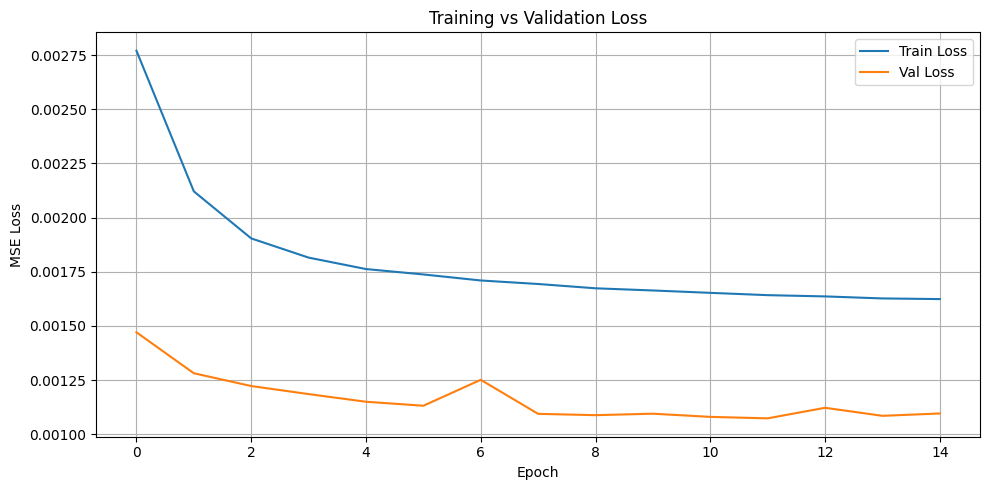

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
y_pred_scaled = model.predict(X_test[:100])
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test[:100].reshape(-1, 1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


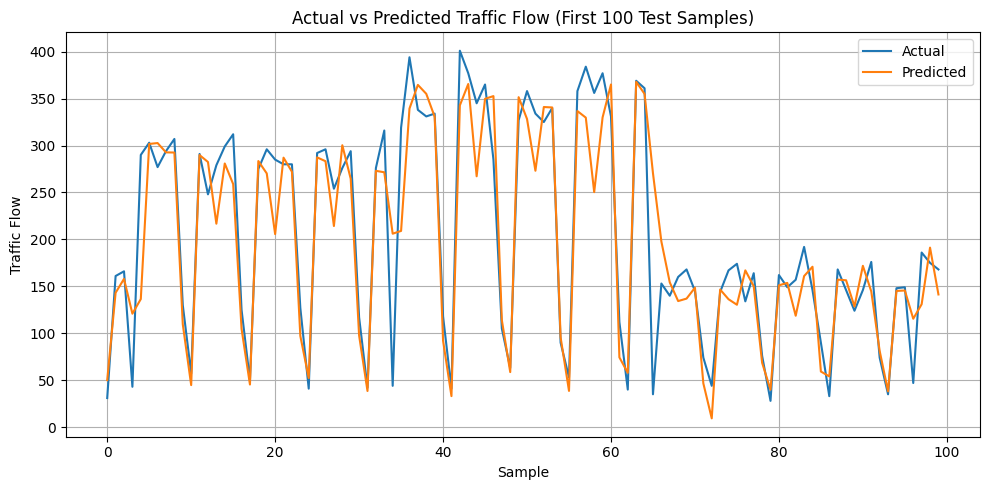

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.xlabel("Sample")
plt.ylabel("Traffic Flow")
plt.title("Actual vs Predicted Traffic Flow (First 100 Test Samples)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(" MAE (Mean Absolute Error):", round(mae, 2))
print(" R² Score:", round(r2, 4))

 MAE (Mean Absolute Error): 30.19
 R² Score: 0.8294
